<a href="https://colab.research.google.com/github/davidogm/CURSO-INTERNACIONAL-GOBIERNO-DEL-DATO/blob/main/Modulo2/Practica/Dashboard_KPIs_UX_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dashboard de Calidad de Datos (Caso ficticio UX)

Este notebook carga un **dataset ficticio** con errores de calidad y calcula los **KPIs** clave.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('UX_dataset_ficticio_calidad.csv', parse_dates=['FechaNacimiento','FechaActualizacion'])
df.head()

,EstudianteID,Email,NotaERP,NotaLMS,FechaNacimiento,FechaActualizacion,Egresado
0,1001,user0@gmail.com,7,7,1987-12-23,2024-12-27,Sí
1,1002,NaN,7,7,2007-08-02,2023-05-16,No
2,1003,user2@gmail.com,5,5,2008-10-14,2020-12-21,Sí
3,1004,user3@gmail.com,7,7,2009-11-24,2024-11-08,No
4,1004,estudiante4@uac.edu,7,7,1975-03-07,2024-05-18,No


In [2]:
df['EmailValido'] = df['Email'].apply(lambda x: pd.notnull(x) and '@' in str(x) and '.' in str(x) and 'NULL' not in str(x))
df['EsDuplicado'] = df.duplicated(subset=['EstudianteID'], keep=False)
df['NotasValidas'] = df.apply(lambda r: 0 <= r['NotaERP'] <= 10 and 0 <= r['NotaLMS'] <= 10, axis=1)
df['DifNotas'] = (df['NotaERP'] - df['NotaLMS']).abs()
cutoff = df['FechaActualizacion'].max() - pd.DateOffset(months=12)
df['Actualizado12m'] = df['FechaActualizacion'] >= cutoff
df.head()

,EstudianteID,Email,NotaERP,NotaLMS,FechaNacimiento,FechaActualizacion,Egresado,EmailValido,EsDuplicado,NotasValidas,DifNotas,Actualizado12m
0,1001,user0@gmail.com,7,7,1987-12-23,2024-12-27,Sí,True,False,True,0,True
1,1002,NaN,7,7,2007-08-02,2023-05-16,No,False,False,True,0,False
2,1003,user2@gmail.com,5,5,2008-10-14,2020-12-21,Sí,True,False,True,0,False
3,1004,user3@gmail.com,7,7,2009-11-24,2024-11-08,No,True,True,True,0,True
4,1004,estudiante4@uac.edu,7,7,1975-03-07,2024-05-18,No,True,True,True,0,False


In [3]:
total = len(df)
kpi_expedientes_completos = df['EmailValido'].mean() * 100
kpi_sin_duplicados = df['EstudianteID'].nunique() / total * 100
kpi_notas_validas = df['NotasValidas'].mean() * 100
kpi_dif_media = df['DifNotas'].mean()
egresados = df[df['Egresado'] == 'Sí']
kpi_egresados_actualizados = (egresados['Actualizado12m'].mean() * 100) if len(egresados) else 0

resumen = pd.DataFrame({
    'KPI': [
        '% Expedientes completos',
        '% Registros sin duplicados',
        '% Calificaciones válidas (0-10)',
        'Diferencia media ERP-LMS (notas)',
        '% Egresados con datos actualizados <12m'
    ],
    'Valor': [
        round(kpi_expedientes_completos,2),
        round(kpi_sin_duplicados,2),
        round(kpi_notas_validas,2),
        round(kpi_dif_media,2),
        round(kpi_egresados_actualizados,2)
    ]
})
resumen

,KPI,Valor
0,% Expedientes completos,72.50
1,% Registros sin duplicados,91.67
2,% Calificaciones válidas (0-10),89.17
3,Diferencia media ERP-LMS (notas),0.72
4,% Egresados con datos actualizados <12m,22.81


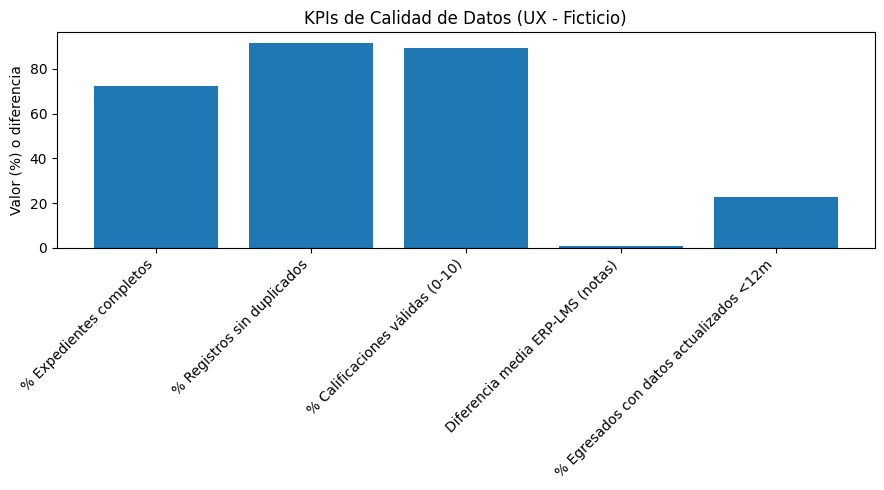

In [5]:
plt.figure(figsize=(9,5))
plt.bar(resumen['KPI'], resumen['Valor'])
plt.xticks(rotation=45, ha='right')
plt.title('KPIs de Calidad de Datos (UX - Ficticio)')
plt.ylabel('Valor (%) o diferencia')
plt.tight_layout()
plt.show()

In [6]:
resumen.to_csv('UX_kpis_resumen.csv', index=False)
'Archivo generado: UX_kpis_resumen.csv'

'Archivo generado: UX_kpis_resumen.csv'